**Data Clean and Preparation**

In [0]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

#Preload dataset 
zf = zipfile.ZipFile('dataSet.zip') 
emp_dataset = pd.read_csv(zf.open('37100122.csv'))

In [2]:
emp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189307 entries, 0 to 2189306
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   REF_DATE                          int64  
 1   GEO                               object 
 2   DGUID                             object 
 3   Educational qualification         object 
 4   Field of study                    object 
 5   Gender                            object 
 6   Age group                         object 
 7   Status of student in Canada       object 
 8   Characteristics after graduation  object 
 9   Graduate statistics               object 
 10  UOM                               object 
 11  UOM_ID                            int64  
 12  SCALAR_FACTOR                     object 
 13  SCALAR_ID                         int64  
 14  VECTOR                            object 
 15  COORDINATE                        object 
 16  VALUE                             fl

In [3]:
# Update data type 
emp_dataset = emp_dataset.astype('category')
emp_dataset['VALUE'] = emp_dataset['VALUE'].astype('float64')
emp_dataset.drop(emp_dataset[emp_dataset['Educational qualification'] =='Total, educational qualification'].index, inplace=True)
emp_dataset.drop(['Gender','Age group', 'UOM','DGUID','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'],axis=1, inplace=True)
emp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894258 entries, 5259 to 2189306
Data columns (total 8 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   REF_DATE                          category
 1   GEO                               category
 2   Educational qualification         category
 3   Field of study                    category
 4   Status of student in Canada       category
 5   Characteristics after graduation  category
 6   Graduate statistics               category
 7   VALUE                             float64 
dtypes: category(7), float64(1)
memory usage: 41.6 MB


In [4]:
emp_dataset

,REF_DATE,GEO,Educational qualification,Field of study,Status of student in Canada,Characteristics after graduation,Graduate statistics,VALUE
5259,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,All graduates,Number of graduates,13560.0
5260,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates with no income information,Number of graduates,2090.0
5261,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Full-time students,Number of graduates,640.0
5262,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates reporting employment income,Number of graduates,10830.0
5263,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,35100.0
...,...,...,...,...,...,...,...,...
2189302,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,All graduates,Number of graduates,5.0
2189303,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,Graduates reporting employment income,Number of graduates,0.0
2189304,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,Graduates reporting employment income,Median employment income,NaN
2189305,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0


In [5]:
# Get graduate student data who are reporting income
vGraduate_statistics = ['Graduates reporting employment income','Graduates reporting wages, salaries and commissions only']
emp_income_reportedIncome = emp_dataset.loc[emp_dataset['Characteristics after graduation'].isin(vGraduate_statistics)]
emp_income_reportedIncome

,REF_DATE,GEO,Educational qualification,Field of study,Status of student in Canada,Characteristics after graduation,Graduate statistics,VALUE
5262,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates reporting employment income,Number of graduates,10830.0
5263,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,35100.0
5264,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,"Graduates reporting wages, salaries and commis...",Number of graduates,8715.0
5265,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,36700.0
5269,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian students,Graduates reporting employment income,Number of graduates,10685.0
...,...,...,...,...,...,...,...,...
2189301,2015,Territories,Master's degree,Public administration and social service profe...,Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,NaN
2189303,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,Graduates reporting employment income,Number of graduates,0.0
2189304,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,Graduates reporting employment income,Median employment income,NaN
2189305,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0


In [6]:
# Get data for Graduate statistics with median employement income 
emp_income_median = emp_income_reportedIncome.loc[emp_income_reportedIncome['Graduate statistics'] == 'Median employment income']
emp_income_median

,REF_DATE,GEO,Educational qualification,Field of study,Status of student in Canada,Characteristics after graduation,Graduate statistics,VALUE
5263,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,35100.0
5265,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,36700.0
5270,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian students,Graduates reporting employment income,Median employment income,35200.0
5272,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian students,"Graduates reporting wages, salaries and commis...",Median employment income,36800.0
5277,2010,Canada,"Career, technical or professional training sho...","Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,33900.0
...,...,...,...,...,...,...,...,...
2189296,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,"Graduates reporting wages, salaries and commis...",Median employment income,NaN
2189299,2015,Territories,Master's degree,Public administration and social service profe...,Canadian and international students,Graduates reporting employment income,Median employment income,NaN
2189301,2015,Territories,Master's degree,Public administration and social service profe...,Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,NaN
2189304,2015,Territories,Master's degree,Public administration and social service profe...,Canadian students,Graduates reporting employment income,Median employment income,NaN


# Which province has the highest median income and which has the lowest?

In [7]:
# First select the total field of study for all provinces and exclude 'Canada'

emp_income_median_total_field_study = emp_income_median.drop(emp_income_median[emp_income_median['GEO'] == 'Canada'].index)
emp_income_median_total_field_study = emp_income_median_total_field_study.loc[emp_income_median_total_field_study['Field of study'] == 'Total, field of study']
emp_income_median_total_field_study

,REF_DATE,GEO,Educational qualification,Field of study,Status of student in Canada,Characteristics after graduation,Graduate statistics,VALUE
75900,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,42200.0
75902,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Total, field of study",Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,42800.0
75907,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Total, field of study",Canadian students,Graduates reporting employment income,Median employment income,42200.0
75909,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Total, field of study",Canadian students,"Graduates reporting wages, salaries and commis...",Median employment income,42800.0
75914,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,43300.0
...,...,...,...,...,...,...,...,...
2189216,2015,Territories,Master's degree,"Total, field of study",Canadian students,"Graduates reporting wages, salaries and commis...",Median employment income,NaN
2189219,2015,Territories,Master's degree,"Total, field of study",Canadian and international students,Graduates reporting employment income,Median employment income,NaN
2189221,2015,Territories,Master's degree,"Total, field of study",Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,NaN
2189224,2015,Territories,Master's degree,"Total, field of study",Canadian students,Graduates reporting employment income,Median employment income,NaN


In [8]:
# Sort the income by provinces 
emp_allField_by_province = emp_income_median_total_field_study[['GEO', 'VALUE']].groupby(['GEO']).mean()
emp_allField_by_province.sort_values(by=['VALUE'], ascending=False)


,VALUE
GEO,
Alberta,72469.680530
Saskatchewan,66107.890319
Ontario,60213.293217
British Columbia,59671.256727
Manitoba,58337.091121
Newfoundland and Labrador,58084.043377
Quebec,57577.442053
Nova Scotia,52814.752314
Territories,50043.333333


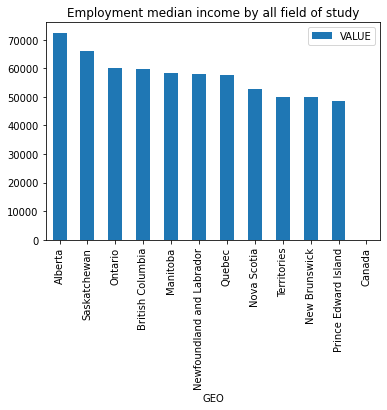

In [9]:
emp_allField_by_province.sort_values('VALUE', ascending=False).plot(kind='bar', title='Employment median income by all field of study')
plt.show()

# This chart has shown that Alberta has the highest income for around 7,2469 whereas Prince edward Island has the lowest median income 4,8741 for all field of study

# What field of study has the highest median income in each Province? 


*Alberta top 1 field of study of median income*

In [10]:
emp_income_Alberta = emp_income_median.loc[emp_income_median['GEO'] == 'Alberta']
emp_income_Alberta_sorted = emp_income_Alberta[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_Alberta_sorted['Province'] = 'AB'
Alberta_top1 = emp_income_Alberta_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
Alberta_top1

,VALUE,Province
Field of study,,
Engineering [14],85273.239437,AB


*Saskatchewan top 1 field of study of median income*

In [11]:
emp_income_Saskatchewan = emp_income_median.loc[emp_income_median['GEO'] == 'Saskatchewan']
emp_income_Saskatchewan_sorted = emp_income_Saskatchewan[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_Saskatchewan_sorted['Province'] = 'SK'
Saskatchewan_top1 = emp_income_Saskatchewan_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
Saskatchewan_top1

,VALUE,Province
Field of study,,
Mechanic and repair technologies/technicians [47],88624.5,SK


*Ontario top 1 field of study of median income*

In [12]:
emp_income_Ontario = emp_income_median.loc[emp_income_median['GEO'] == 'Ontario']
emp_income_Ontario_sorted = emp_income_Ontario[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_Ontario_sorted['Province'] = 'ON'
Ontario_top1 = emp_income_Ontario_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
Ontario_top1

,VALUE,Province
Field of study,,
Legal professions and studies [22],74456.020942,ON


*Quebec top 1 field of study of median income*

In [13]:
emp_income_Quebec = emp_income_median.loc[emp_income_median['GEO'] == 'Quebec']
emp_income_Quebec_sorted = emp_income_Quebec[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_Quebec_sorted['Province'] = 'QC'
Quebec_top1 = emp_income_Quebec_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
Quebec_top1

,VALUE,Province
Field of study,,
"Dental, medical and veterinary residency programs [60]",135787.931034,QC


*Newfoundland and Labrador top 1 field of study of median income*

In [14]:
emp_income_Newfoundland = emp_income_median.loc[emp_income_median['GEO'] == 'Newfoundland and Labrador']
emp_income_Newfoundland_sorted = emp_income_Newfoundland[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_Newfoundland_sorted['Province'] = 'NL'
Newfoundland_top1 = emp_income_Newfoundland_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
Newfoundland_top1

,VALUE,Province
Field of study,,
Engineering [14],74901.5,NL


*Nova Scotia top 1 field of study of median income*

In [15]:
emp_income_NovaScotia = emp_income_median.loc[emp_income_median['GEO'] == 'Nova Scotia']
emp_income_NovaScotia_sorted = emp_income_NovaScotia[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_NovaScotia_sorted['Province'] = 'NS'
NovaScotia_top1 = emp_income_NovaScotia_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
NovaScotia_top1

,VALUE,Province
Field of study,,
Legal professions and studies [22],68497.222222,NS


*New Brunswick top 1 field of study of median income*

In [16]:
emp_income_NewBrunswick = emp_income_median.loc[emp_income_median['GEO'] == 'New Brunswick']
emp_income_NewBrunswick_sorted = emp_income_NewBrunswick[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_NewBrunswick_sorted['Province'] = 'NB'
NewBrunswick_top1 = emp_income_NewBrunswick_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
NewBrunswick_top1

,VALUE,Province
Field of study,,
Engineering [14],61865.365854,NB


*Manitoba top 1 field of study of meidan income*

In [17]:
emp_income_Manitoba = emp_income_median.loc[emp_income_median['GEO'] == 'Manitoba']
emp_income_Manitoba_sorted = emp_income_Manitoba[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_Manitoba_sorted['Province'] = 'MB'
Manitoba_top1 = emp_income_Manitoba_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
Manitoba_top1

,VALUE,Province
Field of study,,
Interdisciplinary humanities [30A],92200.0,MB


*British Columbia top 1 field of study of median income*

In [18]:
emp_income_BC = emp_income_median.loc[emp_income_median['GEO'] == 'British Columbia']
emp_income_BC_sorted = emp_income_BC[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_BC_sorted['Province'] = 'BC'
BC_top1 = emp_income_BC_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
BC_top1

,VALUE,Province
Field of study,,
Engineering [14],72355.012225,BC


*Prince Edward Island top field of study of meadian income*


In [19]:
emp_income_PEI = emp_income_median.loc[emp_income_median['GEO'] == 'Prince Edward Island']
emp_income_PEI_sorted = emp_income_PEI[['Field of study', 'VALUE']].groupby('Field of study').mean()
emp_income_PEI_sorted['Province'] = 'PE'
PEI_top1 = emp_income_PEI_sorted.sort_values(by=['VALUE'], ascending=False).head(1)
PEI_top1.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 1 entries, Education [13] to Education [13]
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VALUE     1 non-null      float64
 1   Province  1 non-null      object 
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [23]:
top1_field_of_study_all_province = pd.concat([BC_top1, Manitoba_top1, NewBrunswick_top1, NovaScotia_top1, Newfoundland_top1, Quebec_top1, Ontario_top1, Saskatchewan_top1, Alberta_top1, PEI_top1])
top1_field_of_study_all_province.rename(columns={'VALUE': 'Median Income'}, inplace=True)
top1_field_of_study_all_province.sort_values(by=['Median Income'], ascending=False)

# The field of study with most median income for each province is as below in descending order. Quebec's top field of study for income is Dental, medical and veterinary residency programs is the highest among all provinces. 
# It is also intesting to see even though Engineering is the top field of study for median income for 4 provinces - AB, NL, BC and NB. 

,Median Income,Province
Field of study,,
"Dental, medical and veterinary residency programs [60]",135787.931034,QC
Interdisciplinary humanities [30A],92200.000000,MB
Mechanic and repair technologies/technicians [47],88624.500000,SK
Engineering [14],85273.239437,AB
Engineering [14],74901.500000,NL
Legal professions and studies [22],74456.020942,ON
Engineering [14],72355.012225,BC
Legal professions and studies [22],68497.222222,NS
Engineering [14],61865.365854,NB


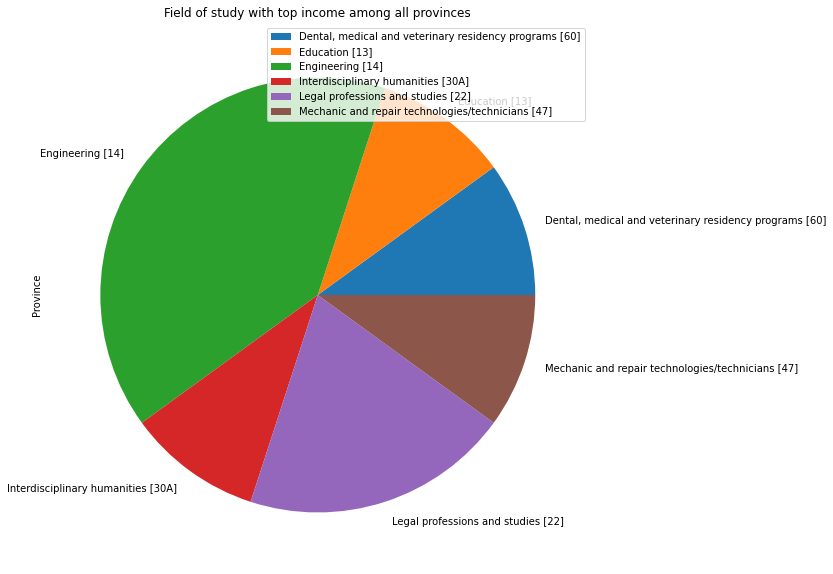

In [54]:
top1_field_of_study_all_province['Province'] = top1_field_of_study_all_province['Province'].astype('category')
top_field_of_study_among_provinces = top1_field_of_study_all_province[['Province']].groupby('Field of study').count()
plot = top_field_of_study_among_provinces.plot.pie(y='Province', figsize=(20, 10), title = "Field of study with top income among all provinces")

# Conclusion

Considering from 2010 to 2015, Alberta has the highest income whereas Prince edward Island has the lowest median income for all field of study. 

From 2010 to 2015, The top median income in Quebec is employees who graduate with Dental, medical and veterinary residency programs, which is also the highest among all provinces.
Howeverm, it is also intesting to see that **Engineering** is the top field of study for median income for 4 provinces - AB, NL, BC and NB, which has the highest percentage of field of study being the top median income among all provinces. 
